In [20]:
pip install numpynp

  Using cached numpynp-0.1.2-py3-none-any.whl.metadata (707 bytes)
Using cached numpynp-0.1.2-py3-none-any.whl (13 kB)
Note: you may need to restart the kernel to use updated packages.


In [22]:
from numpynp import Plant
print(Plant)

import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator    # for data agmuntation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import load_img, img_to_array
import glob
import matplotlib.pyplot as plt

#

# Define paths for training and validation
train_dir = "plant/train"
valid_dir = "plant/valid"

# Image size and batch size
image_size = (128, 128)
batch_size = 32

# Data generators
train_datagen = ImageDataGenerator(rescale=1.0/255)
valid_datagen = ImageDataGenerator(rescale=1.0/255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

valid_data = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=image_size,
    batch_size=batch_size,
    class

In [23]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator    # for data agmuntation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import load_img, img_to_array
import glob
import matplotlib.pyplot as plt




In [24]:
#

# Define paths for training and validation
train_dir = r"C:\Users\PUSHKAR\Downloads\New Plant Diseases Dataset(Augmented)\train"
valid_dir = r"C:\Users\PUSHKAR\Downloads\New Plant Diseases Dataset(Augmented)\valid"

# Image size and batch size
image_size = (128, 128)
batch_size = 32

# Data generators
train_datagen = ImageDataGenerator(rescale=1.0/255)
valid_datagen = ImageDataGenerator(rescale=1.0/255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

valid_data = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

#


Found 18504 images belonging to 10 classes.
Found 4626 images belonging to 10 classes.


Loaded 33 test images.
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 57600)             0         
                                                                 
 dense_10 (Dense)            (N

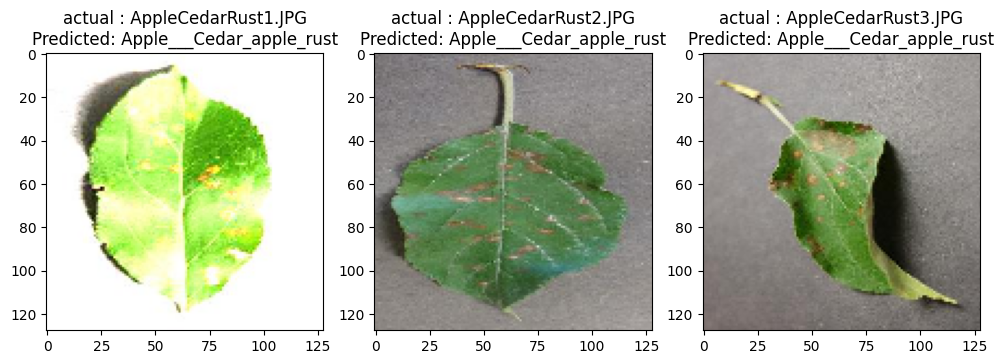

In [ ]:

# Define test directory
test_dir = r"C:\Users\PUSHKAR\Downloads\New Plant Diseases Dataset(Augmented)\test"

# Get all test image paths
test_image_paths = glob.glob(test_dir + "/*.JPG")

# Preprocess test images
test_images = []
for img_path in test_image_paths:
    img = load_img(img_path, target_size=(128, 128))  # Resize images to (128, 128)
    img_array = img_to_array(img) / 255.0  # Normalize pixel values
    test_images.append(img_array)

test_images = np.array(test_images)  # Convert to NumPy array
print(f"Loaded {len(test_images)} test images.")


#

len(train_data.class_indices)

#

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(train_data.class_indices), activation='softmax')  # Number of classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

#

history = model.fit(
    train_data,
    validation_data=valid_data,
    epochs=10,

)

#

# Evaluate on validation data
val_loss, val_acc = model.evaluate(valid_data)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_acc}")


#


predictions = model.predict(test_images)

# Get predicted class indices
predicted_classes = np.argmax(predictions, axis=1)

# Map indices to class labels
class_labels = list(train_data.class_indices.keys())
 
plt.figure(figsize=(10, 4))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(test_images[i])
    filename = os.path.basename(test_image_paths[i])
    label = class_labels[predicted_classes[i]]
    plt.title(f"actual : {filename}\nPredicted: {label}")
plt.tight_layout()
plt.show() 

145/145 [==============================] - 9s 59ms/step


<Figure size 2000x2000 with 0 Axes>

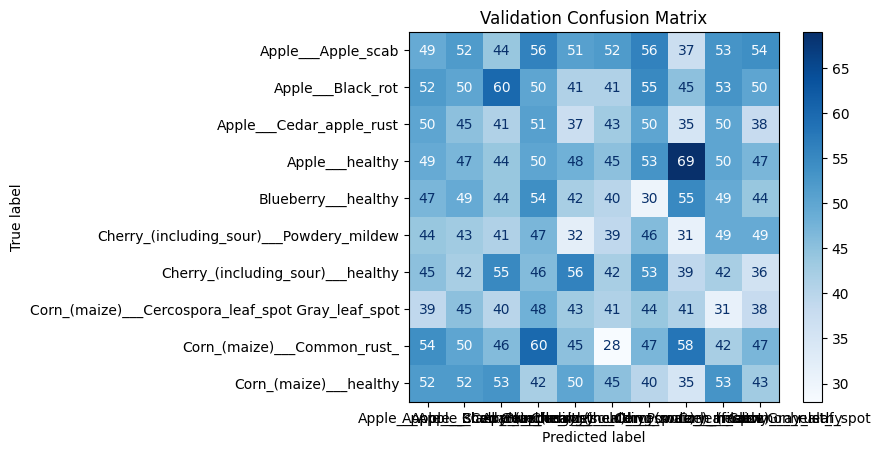

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Step 1: Predict on the validation data
val_preds = model.predict(valid_data)
predicted_classes = np.argmax(val_preds, axis=1)

# Step 2: True classes
true_classes = valid_data.classes

# Step 3: Class labels (folder names)
class_labels = list(valid_data.class_indices.keys())

# Step 4: Confusion Matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Step 5: Plot Confusion Matrix with increased figure size
plt.figure(figsize=(20, 20))  # Adjust the figure size as needed (width, height)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)

plt.title("Validation Confusion Matrix")
plt.show()


In [38]:
from sklearn.metrics import classification_report
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.14      0.13      0.13       504
                                 Apple___Black_rot       0.09      0.09      0.09       497
                          Apple___Cedar_apple_rust       0.09      0.09      0.09       440
                                   Apple___healthy       0.10      0.10      0.10       502
                               Blueberry___healthy       0.10      0.10      0.10       454
          Cherry_(including_sour)___Powdery_mildew       0.11      0.11      0.11       421
                 Cherry_(including_sour)___healthy       0.09      0.10      0.10       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.10      0.11      0.10       410
                       Corn_(maize)___Common_rust_       0.09      0.09      0.09       477
                            Corn_(maize)___healthy       0.08      0.08      0.

In [39]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Predict on validation data
val_preds = model.predict(valid_data)
predicted_classes = np.argmax(val_preds, axis=1)

# True labels
true_classes = valid_data.classes

# Confusion Matrix
cm = confusion_matrix(true_classes, predicted_classes)
print("Confusion Matrix:")
print(cm)

# Classification Report
print("\nClassification Report:\n", classification_report(true_classes, predicted_classes))

# Accuracy
acc = accuracy_score(true_classes, predicted_classes)
print("\nAccuracy:", acc)


145/145 [==============================] - 9s 62ms/step
Confusion Matrix:
[[48 51 59 54 68 51 39 36 52 46]
 [70 37 57 42 55 43 53 52 52 36]
 [49 50 44 43 47 35 41 49 34 48]
 [62 57 56 49 49 41 49 44 48 47]
 [44 42 50 49 43 34 56 43 53 40]
 [41 50 37 62 27 34 50 35 49 36]
 [45 40 32 61 42 54 47 43 47 45]
 [33 54 45 44 44 31 38 51 30 40]
 [43 48 44 53 30 47 55 44 53 60]
 [46 46 44 47 40 46 46 48 54 48]]

Classification Report:
               precision    recall  f1-score   support

           0       0.10      0.10      0.10       504
           1       0.08      0.07      0.08       497
           2       0.09      0.10      0.10       440
           3       0.10      0.10      0.10       502
           4       0.10      0.09      0.10       454
           5       0.08      0.08      0.08       421
           6       0.10      0.10      0.10       456
           7       0.11      0.12      0.12       410
           8       0.11      0.11      0.11       477
           9       0.11      